![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Teste 3: Método de Newton

Vamos continuar o problema de calcular a função inversa de $f(x) = x e^x$.

# Questão 1: Newton para inversão

Vamos generalizar o método de Newton para encontrar raizes de $f(x) = y$.

Inclua abaixo tanto o método de Newton, retornando **todos** os pontos percorridos até encontrar a raiz.

In [2]:
def newton_y(f, df, y, x0, xtol=1e-12, maxiter=50):
    it = 0
    err = 10
    raizes = []

    while (err >= xtol) and (it < maxiter):
        passo = (f(x0) - y) / df(x0)
        x = x0 - passo
        err = abs(passo)
        raizes.append(x)
        x0 = x
        it += 1

    return raizes

In [3]:
def f1(x):
    return x * np.log(x)

def df1(x):
    return np.log(x) + 1

pts_newton = newton_y(f1, df1, 1.1, 1)
assert abs(f1(pts_newton[-1]) - 1.1) < 1e-10

In [4]:
pts_newton = newton_y(f1, df1, 1.1, 1)

assert abs(f1(pts_newton[1]) - 1.1) > 1e-3
assert 3 < len(pts_newton) < 10

In [5]:
def f2(x):
    return x * np.sin(x)

def df2(x):
    return np.sin(x) + x * np.cos(x)

pts_newton = newton_y(f2, df2, 1.1, 1)
assert abs(f2(pts_newton[-1]) - 1.1) < 1e-10

# Questão 2: Gráficos

O método de Newton funciona bem quando a primeira derivada está suficientemente longe de zero.

## Questão 2.1: Derivada
Faça um gráfico da derivada $f'(x)$, e deduza as regiões onde o método de Newton provavelmente funciona bem,
e onde ele funciona mal.

In [6]:
def f(x):
    return x * np.exp(x)

def df(x):
    return (x+1) * np.exp(x)

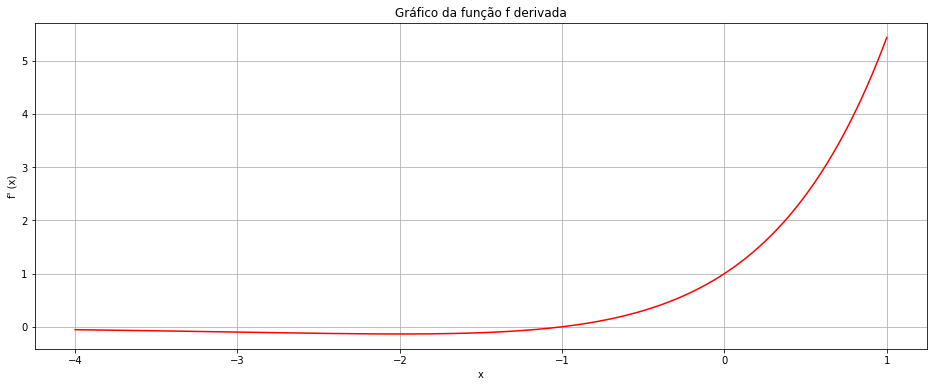

In [7]:
DER = np.vectorize(df)
X = np.linspace(-4, 1, 500)
plt.rcParams['figure.figsize'] = (16,6)
ax = plt.gca()
ax.set_xlabel("x")
ax.set_ylabel("f' (x)")
ax.set_title("Gráfico da função f derivada")
ax.plot(X, DER(X), 'r-')
ax.grid()
plt.show()

In [8]:
assert len(ax.lines) >= 1
assert len(ax.title.get_text()) > 0

In [9]:
ax = None

Em quais regiões o gráfico sugere que será difícil calcular uma raiz de $f(x) = y$?

É provavel que quando $x \rightarrow -\infty $ a derivada de $f(x) \rightarrow 0$. Logo, nesses casos, pode ser que o método de Newton não seja tão eficiente, já que o cálculo do passo dentro do método de Newton faz uma divisão pela derivada, e caso esse valor seja proximo de $0$, o passo será desproporcional(muito grande), e pode bagunçar o método. Além disso, para o ponto exato do mínimo da função, o passo vai resultar em uma divisão por $0$, logo uma indetermição. Portanto para esses valores, é díficil calcular a raiz utilizando o método de Newton

## Questão 2.2: Número de iterações para Newton

Faça o gráfico do número de iterações necessárias para o método de Newton encontrar uma raiz de $f(x) = y$
para $y$ no intervalo $[1,100]$, e partindo de $x_0 = 1$.

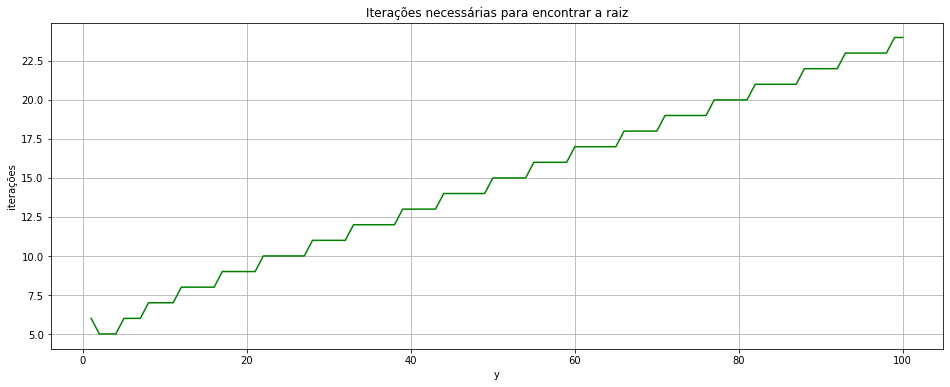

In [10]:
lista = np.linspace(1,100, 100)
y = [ len(newton_y(f, df, y, 1)) for y in lista] 

ax = plt.gca()
ax.set_xlabel("y")
ax.set_ylabel("iterações")
plt.title("Iterações necessárias para encontrar a raiz")
plt.rcParams['figure.figsize'] = (16,6)
ax.plot(lista, y, 'g-')
ax.grid()
plt.show()


In [11]:
assert len(ax.lines) == 1
assert len(ax.title.get_text()) > 0

In [12]:
assert len(ax.get_xlabel()) > 0
assert len(ax.get_ylabel()) > 0

In [13]:
ydata = ax.lines[0].get_ydata()
assert 5 <= min(ydata) <= 7
assert 22 <= max(ydata) <= 30

In [14]:
ax = None

Agora, para cada $y$ (no mesmo intervalo), faça o gráfico
- da raiz encontrada; e
- do maior ponto testado pelo método de Newton,

no mesmo eixo.

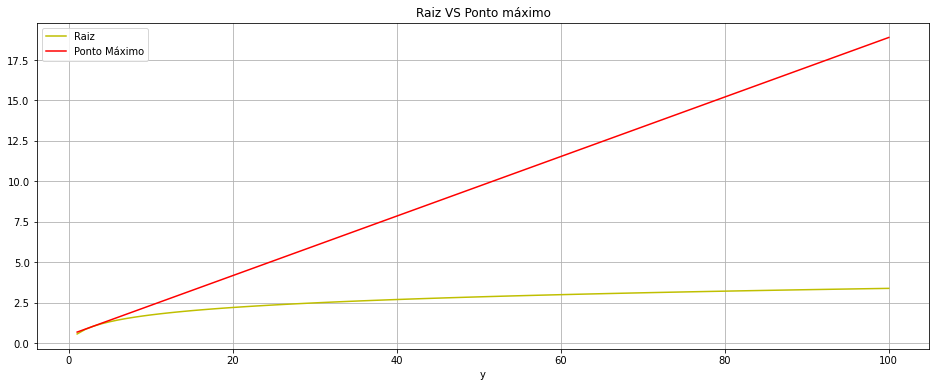

In [15]:
lista = np.linspace(1,100, 100)
raiz = [ newton_y(f, df, y, 1)[-1] for y in lista] 
ponto_max = [ max(newton_y(f, df, y, 1)) for y in lista] 

ax = plt.gca()
ax.set_xlabel("y")
ax.set_ylabel("")
plt.title("Raiz VS Ponto máximo")
plt.rcParams['figure.figsize'] = (16,6)
ax.plot(lista, raiz, 'y-', label = "Raiz")
ax.plot(lista, ponto_max, 'r-', label = "Ponto Máximo")
ax.grid()
plt.legend()
plt.show()


In [16]:
assert len(ax.lines) == 2
assert len(ax.get_legend().texts) == 2
assert len(ax.title.get_text()) > 0

In [17]:
ax = None

Como este gráfico ajuda a explicar o anterior?

O número de iterações necessárias para encontrar a raiz dentro da tolerancia desejada utilizando o método de Newton, pelo gráfico, parece subir em escada, mas se mantém estável em partes, mesmo com a mudança do valor de y, dando uma aprencia de escada no gráfico. No gráfico que compara o ponto máximo com a raiz encontrada, podemos perceber que a raiz cresce de maneira logarítimica, enquanto o ponto máximo cresce de maneira linear. 

## Questão 2.3: Outro ponto inicial

Agora, considere que o ponto inicial para encontrar uma raiz de $x e^x = y$ é $\log y$.
Quantas iterações são necessárias?

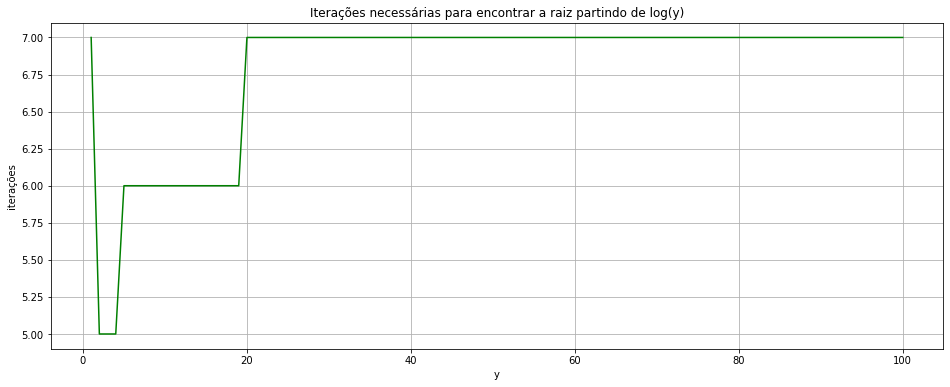

In [18]:
lista = np.linspace(1,100, 100)
y = [ len(newton_y(f, df, y, np.log(y))) for y in lista] 

ax = plt.gca()
ax.set_xlabel("y")
ax.set_ylabel("iterações")
plt.title("Iterações necessárias para encontrar a raiz partindo de log(y)")
plt.rcParams['figure.figsize'] = (16,6)
ax.plot(lista, y, 'g-')
ax.grid()
plt.show()

In [19]:
assert len(ax.lines) == 1
assert len(ax.title.get_text()) > 0

In [20]:
ax = None

O que aconteceu?

Quando o ponto inicial cresce de maneira logaritimica, o número de iterações é menor. Isso acontece devido ao fato de que o ponto inicial não se distancia tanto da raiz em comparação ao exemplo anterior, já que agora, o ponto inicial varia de acordo com $log (y)$.

Refaça os gráficos do maior ponto e da raiz.

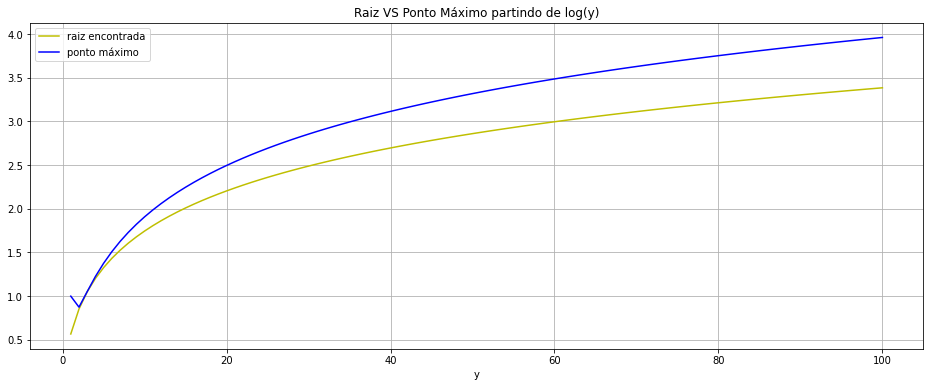

In [21]:
lista = np.linspace(1,100, 100)
raiz = [ newton_y(f, df, y, np.log(y))[-1] for y in lista] 
ponto_max = [ max(newton_y(f, df, y, np.log(y))) for y in lista] 

ax = plt.gca()
ax.set_xlabel("y")
ax.set_ylabel("")
plt.title("Raiz VS Ponto Máximo partindo de log(y)")
plt.rcParams['figure.figsize'] = (16,6)
ax.plot(lista, raiz, 'y-', label = "raiz encontrada")
ax.plot(lista, ponto_max, 'b-', label = "ponto máximo")
ax.grid()
plt.legend()
plt.show()


Como este gráfico ajuda a explicar os anteriores?

Nesse último gráfico, o valor do ponto inicial $x_0$ dado cresce de maneira logarítimica, assim como a raiz, pois é dado como $log(y)$. Assim, para os valores encontrados de $y$, não haverá uma distancia tão grande para a raiz encontrada.

Como nos primeiros gráficos, o ponto inicial $x_0$ é sempre fixo, esse valor fica mais distante da raiz, conforme o valor de $y$ muda, pois até pelo gráfico, é possivel observar que enquanto um cresce linearmente (ponto máximo encontrado) a raiz continua variando logaritimicamente.

Desse modo, quando o ponto inicial para o método de Newton também cresce de maneira logaritimica (ultimos exemplos), o número de iterações é bastante menor e os pontos maximos e o de raiz crescem de maneira muito semelhante. Isso porque, nesses ultimos exemplos, o ponto inicial não se distancia tanto da raiz, mas também cresce de maneira logarítma.

# Questão 3: Regiões difíceis

Vamos agora observar quão difícil é calcular uma raiz de $x e^x = y$ para pontos onde a derivada é praticamente nula.

## Questão 3.1: Ponto de mínimo

Faça um gráfico do número de iterações do método de Newton para calcular a raiz de $x e^x = y$ para $y$ no intervalo $[-1/e, 0]$, começando a partir de $x = 0$.

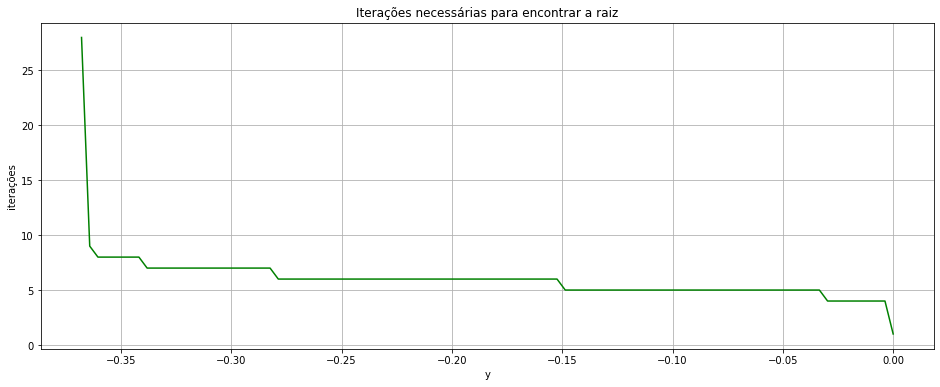

In [22]:
lista = np.linspace(-1/np.e,0, 100)
y = [ len(newton_y(f, df, y, 0)) for y in lista] 

ax = plt.gca()
ax.set_xlabel("y")
ax.set_ylabel("iterações")
plt.title("Iterações necessárias para encontrar a raiz")
plt.rcParams['figure.figsize'] = (16,6)
ax.plot(lista, y, 'g-')
ax.grid()
plt.show()

In [23]:
assert len(ax.lines) == 1
assert len(ax.title.get_text()) > 0

In [24]:
vs = ax.lines[0].get_ydata()
assert max(vs) > 20
assert min(vs) < 5

In [25]:
ax = None

O que você observa no gráfico?

Observo que conforme o valor de $y$ assume valores mais próximos de $0$, o número de iterações diminui, enquanto para valores proximos de $\frac{-1}{e}$, o número de iterações é bem alto. Desse modo, conforme $y \rightarrow 0$, percebe-se uma queda brusca no número de iterações.

Agora, dê um zoom na parte que dá mais iterações.

Dica: o estilo `".:"` para a linha pode ajudar a visualizar o que está acontecendo.

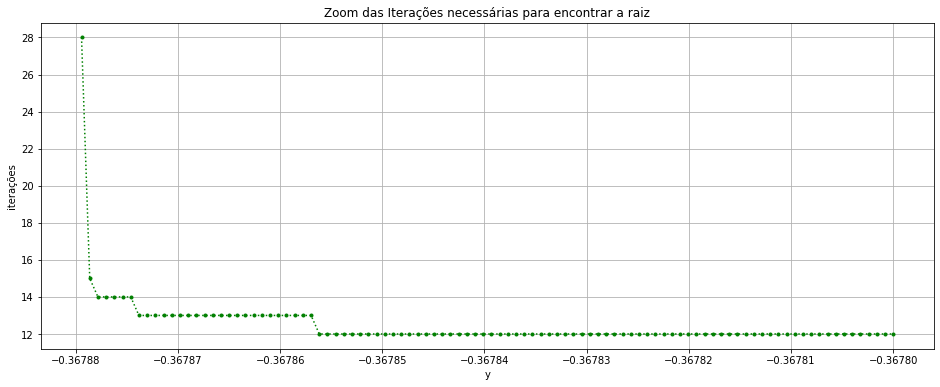

In [26]:
lista = np.linspace(-1/np.e,-0.3678, 100)
y = [ len(newton_y(f, df, y, 0)) for y in lista] 

ax = plt.gca()
ax.set_xlabel("y")
ax.set_ylabel("iterações")
plt.title("Zoom das Iterações necessárias para encontrar a raiz")
plt.rcParams['figure.figsize'] = (16,6)
ax.plot(lista, y, 'g.:')
ax.grid()
plt.show()

In [27]:
vs = ax.lines[0].get_ydata()
assert max(vs) > 20
assert 10 < min(vs) < 15

In [28]:
ax = None

## Questão 3.2: Erros

Agora, vamos construir $y = z e^z$ para $z$ entre 0 e -1.
Assim, já saberemos qual a raiz de $x e^x = y$.

Com isto, faça o gráfico do **erro absoluto** entre a raiz encontrada pelo método de Newton - começando de 0, como na questão anterior - e o valor real.

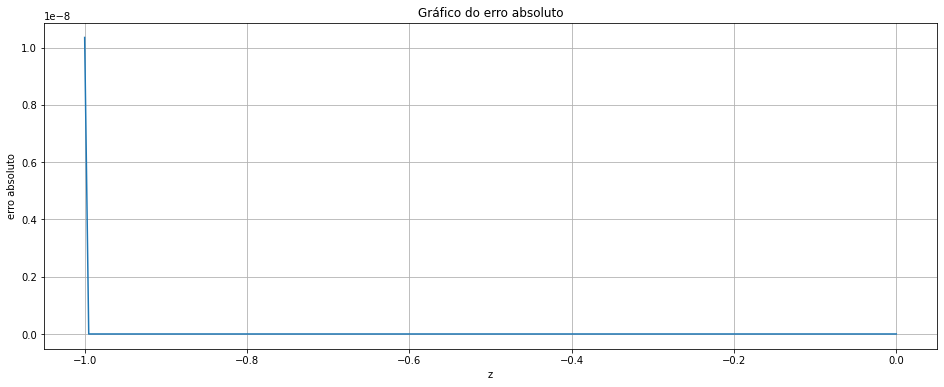

In [29]:
x = np.linspace(-1,0, 200)
y = f(x)
raiz = [newton_y(f, df, i, 0)[-1] for i in y] 

ax = plt.gca()
ax.set_xlabel("z")
ax.set_ylabel("erro absoluto")
plt.title("Gráfico do erro absoluto")
plt.rcParams['figure.figsize'] = (16,6)
ax.plot(x, abs(raiz-x) )
ax.grid()
plt.show()

## Questão 3.3: Um outro ponto de vista

Vamos fazer um zoom na parte que dá maior erro.

Para poder observar bem o que acontece, vamos olhar para $z = -1 + w$, e fazer o gráfico do erro em função de $w$.

Dica: para escolher a melhor escala para os eixos, teste as diferentes combinações!

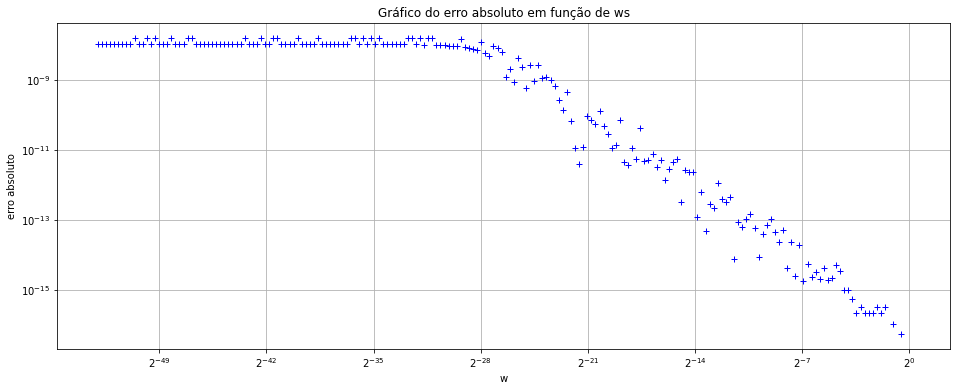

In [30]:
ws = np.logspace(-53,0, num=200, base=2)
zs = -1 + ws
y= f(zs)
raiz = [newton_y(f, df, i, 0)[-1] for i in y] 

plt.rcParams['figure.figsize'] = (16,6)
ax = plt.gca()
ax.plot(ws, abs(raiz - zs) , 'b+')
ax.set_xlabel("w")
ax.set_ylabel("erro absoluto")
ax.set_xscale('log', basex=2)
ax.set_yscale('log')
plt.title("Gráfico do erro absoluto em função de ws")
ax.grid()
plt.show()


O que você observa?

--- 
É possivel observar que conforme o valor de $zs$ assume valores próximos a $-1$, o erro tende a crescer muito, praticamente na vertical, enquanto para valores de $zs$ proximos a $0$, o erro é praticamente insignificante. Já analizando em uma escala logaritima de base $2$ para o eixo das abscissas (que representa o $w$), percebe-se que esse erro decresce de maneira mais suave, já agora a base é logaritimica. Dessa maneira, é perceptível que o erro cresce exponencialmente, como já analisado nos gráficos anteriores, mas agora de maneira mais evidente por conta da troca de variaveis e da escala logarítimica.

Portanto, para os valores onde $ws \rightarrow 0$, temos que $zs \rightarrow -1$, que são os pontos em que o erro cresce muito para o método de newton (próximo a raiz). Enquanto conforme $ws \rightarrow 1$, ou seja, $2^0 $, o erro tende a diminuir, pois agora $zs \rightarrow 0$.


Dessa maneira, os gráficos se complementam, em escalas diferentes.



